## Planar data classification with one hidden layer

#### import required packages

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from planar_utils import load_planar_dataset

%matplotlib inline

#### load the data and plot the data 

In [2]:
X_data, Y_data = load_planar_dataset()

print(X_data.shape, Y_data.shape)

(2, 400) (1, 400)


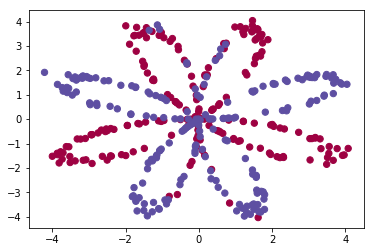

In [3]:
# Visualize the data:
y_list = Y_data.tolist()
y = [j for i in y_list for j in i]
plt.scatter(X_data[0, :], X_data[1, :], c = y,s=40, cmap=plt.cm.Spectral);

tf.reset_default_graph()

#### Create placeholder for the input and output 

In [4]:
X = tf.placeholder(tf.float32, shape = [2,400], name = 'Input')
Y = tf.placeholder(tf.float32, shape = [1,400], name = 'Desired_output')

no_of_node = 5
m = 400

W1 = tf.Variable(tf.random_uniform([no_of_node,2], maxval = .001, seed = 1), tf.float32, name = 'Weight_layer1')
b1 = tf.Variable(tf.random_uniform([no_of_node, 1], maxval = .001, seed = 1), tf.float32, name = 'Bias_layer1')

W2 = tf.Variable(tf.random_uniform([1,no_of_node], maxval = .001, seed = 2), tf.float32, name = 'Weight_layer2')
b2 = tf.Variable(tf.random_uniform([1,1], maxval = .001, seed = 2), tf.float32, name = 'Bias_layer2')




#### Calculate forward propagation and backward propagation

In [5]:
#Forward propagation
A0 = X

Z1 = tf.matmul(W1 , A0) + b1
A1 = tf.sigmoid(Z1)

Z2 = tf.matmul(W2, A1) +  b2
A2 = tf.sigmoid(Z2)

#Backward propagation
#DA2 = tf.reduce_sum((-Y / A2 )+ ((1 - Y) / (1 - A2)) , axis = 1, keep_dims = True)
#DZ2 = tf.multiply(DA2, A2 * (1 - A2))
DZ2 = tf.subtract(A2, Y)
DW2 = tf.matmul(DZ2, tf.transpose(A1)) / (m)
DB2 = tf.reduce_sum(DZ2, axis = 1, keep_dims = True) / (m)

DA1 = tf.matmul(tf.transpose(W2), DZ2)
DZ1 = tf.multiply(DA1, A1 * (1 - A1))
DW1 = tf.matmul(DZ1, tf.transpose(A0)) / (m)
DB1 = tf.reduce_sum(DZ1, axis = 1, keep_dims = True) / (m)

In [6]:
epoch = 500

learning_rate = tf.constant(3.5, name = 'learning_rate')

iteration_cost = []
cost =tf.reduce_sum(Y * tf.log(A2) + (1 - Y) * tf.log(1 - A2)) * (-1)


assign_w1     = W1.assign_sub(learning_rate * DW1)

assign_b1     = b1.assign_sub(learning_rate * DB1)

assign_w2     = W2.assign_sub(learning_rate * DW2)

assign_b2     = b2.assign_sub(learning_rate * DB2)

init = tf.global_variables_initializer()

### Train our model 

In [7]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(epoch):
        
        sess.run([assign_w2, assign_b2, assign_w1, assign_b1], {X:X_data, Y:Y_data})
        iteration_cost.append(sess.run(cost, {X:X_data, Y:Y_data}))
    w_1 = W1.eval()
    b_1 = b1.eval()
    w_2 = W2.eval()
    b_2 = b2.eval()

### Find training error and plot cost function

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid(np.array([-2, -1, 0, 1, 2]))

array([ 0.11920292,  0.26894142,  0.5       ,  0.73105858,  0.88079708])

In [9]:
#Find training error
m = 400
correct_no_train = 0
total_no_train = 0

for i in range(400):
    A_0 = X_data[:,i].reshape(2,1)
    Z_1 = np.matmul(w_1 , A_0) + b_1
    A_1 = sigmoid(Z_1)

    Z_2 = np.matmul(w_2, A_1) +  b_2
    A_2 = sigmoid(Z_2)
    
    if (np.abs(A_2 - Y_data[:,i]) < 0.5): 
        correct_no_train += 1
    
    total_no_train += 1

print('Training accuracY ' + str(correct_no_train / total_no_train))

Training accuracY 0.875


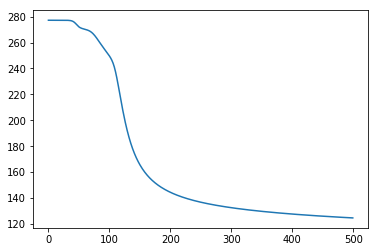

In [10]:
plt.plot(iteration_cost)

#### Conclustion 

#### This accuracy 0.895 with one hidden layer have 3 node, it is due to high bias. It can be solved by increasing  hidden layer.

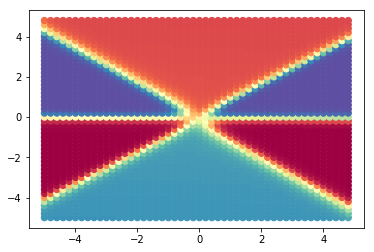

In [73]:


x1_bou = np.arange(-5,5,.2)
x2_bou = np.arange(-5,5,.2)

data = []

for i in x1_bou:
    for j in x2_bou:
        data.append([i,j])

y_bou = []
A_0 = np.array(data).T
Z_1 = np.matmul(w_1 , A_0) + b_1
A_1 = sigmoid(Z_1)

Z_2 = np.matmul(w_2, A_1) +  b_2
A_2 = sigmoid(Z_2)
y_bou.append(A_2)

y_bou = [j for i in y_bou for j in i ]
y_bou = [j for i in y_bou for j in i ]


y_arr_bou = np.array(y_bou)
plt.scatter(A_0[0,:], A_0[1,:], c = y_arr_bou, s=40, cmap=plt.cm.Spectral);



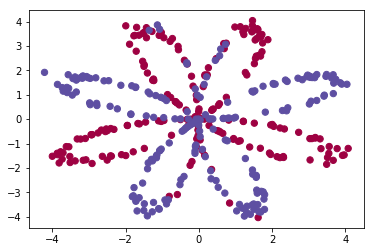

In [74]:
plt.scatter(X_data[0, :], X_data[1, :], c = y,s=40, cmap=plt.cm.Spectral);
